<P> <B> <font color=red size="6"> PLSRegression (Partial Least Squares Regression) </Font></B> </P>

<b>PLSRegression (Partial Least Squares Regression) is a regression technique that models the relationship between the independent variables (features) and the dependent variable by projecting both onto a lower-dimensional space. This technique is useful when the features are highly collinear or when there are more features than observations.</b>

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Load the wine dataset
wine = load_wine()
X = wine.data  # Features
y = wine.target  # Target (classification categories: 0, 1, 2)

In [3]:
# Convert the target to a continuous variable (for regression purposes)
y_continuous = y + 0.1 * X[:, 0]  # Adding a continuous component for regression

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_continuous, test_size=0.2, random_state=42)

In [5]:
# Standardize the features (important for regression models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<b>PLSRegression Initialization:</b>

    n_components=2: Specifies the number of components to use in the model. You can tune this parameter to control the number of latent variables used to capture the variation in the data. It is often chosen based on cross-validation or trial and error.

In [6]:
# Initialize the PLSRegression model
pls = PLSRegression(n_components=2)  # You can adjust the number of components based on the dataset

In [7]:
# Fit the model
pls.fit(X_train, y_train)

PLSRegression()

In [8]:
# Make predictions
y_pred_train = pls.predict(X_train)
y_pred_test = pls.predict(X_test)


In [9]:
# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

In [10]:
print(f"Training Mean Squared Error: {mse_train:.4f}")
print(f"Testing Mean Squared Error: {mse_test:.4f}")
print(f"Training R^2 Score: {r2_train:.4f}")
print(f"Testing R^2 Score: {r2_test:.4f}")

Training Mean Squared Error: 0.0745
Testing Mean Squared Error: 0.0761
Training R^2 Score: 0.8682
Testing R^2 Score: 0.8598


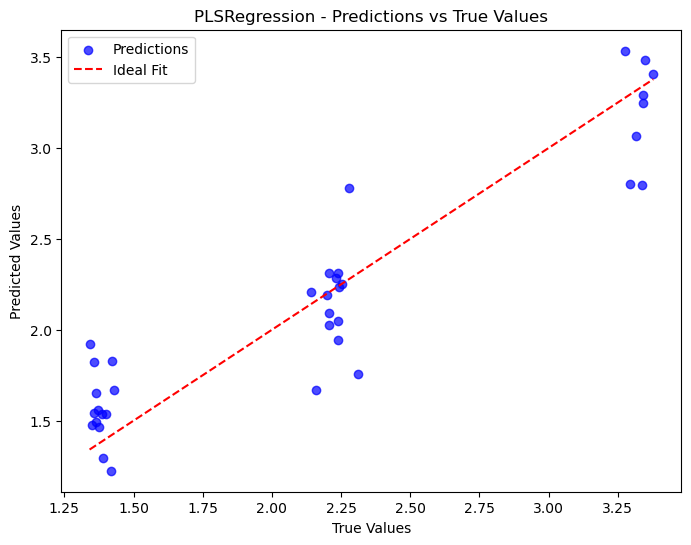

In [11]:
# Visualize predictions vs true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, c='blue', alpha=0.7, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('PLSRegression - Predictions vs True Values')
plt.legend()
plt.show()

<b>Key Points:<b/>
<ol>
    <li>PLSRegression is particularly effective when dealing with multicollinearity (when predictors are highly correlated) or when the number of features exceeds the number of observations.</li>
    <li>The number of components (n_components) is a hyperparameter that determines how many latent variables are used. You may need to experiment with this to optimize performance.</li>
    <li>PLSRegression is often used in chemometrics, bioinformatics, and other fields with many correlated features.</li></ol>